## Method of least squares to fit circles

### Calculation of Circle Coefficients $(ABC)$

The coefficients $(A)$, $(B)$, and $(C)$ in the circle equation $Ax^2 + Bx + Cy + 1 = 0$ are determined using the least squares method. Adjusting these can change the shape, position and the radius of the circle. 

### Equation for the Jacobian Matrix $(J)$
The Jacobian matrix, denoted as $(J)$, is defined as
$$
J = \begin{bmatrix} x_1^2 + y_1^2 & x_1 & y_1 \\ \vdots & \vdots & \vdots \\ x_n^2 + y_n^2 & x_n & y_n \end{bmatrix}
$$
Where $(x_i, y_i)$ are the coordinates given, in this case focused on the posterior ends of the medial and lateral tibial plateau. Each row corresponds to a data point, with the first column representing the sum of squared coordinates, and the second and third columns representing individual coordinates. 

### Objective Function Components
Let $(K)$ be a column vector of ones, and $(J)$ be the Jacobian matrix. The objective function components are given by the residuals (error?) The objective is to minimize the residuals, which are the differences between the observed data and the values predicted by the model.
$$
\begin{align*}
K = \begin{bmatrix} 1 \\ \vdots \\ 1 \end{bmatrix} \\
\end{align*}
$$
     
### Normal Equation Components
Let $(J^T)$ be the transpose of the Jacobian matrix, $(J^TJ$) be the product of $(J^T)$ and $(J)$, and $(InvJ^TJ)$ be the inverse of $(J^TJ)$. The components are given by:
$$
\begin{align*}
J^T &= \text{Transpose of } J \\
J^TJ &= J^T \cdot J \\
InvJ^TJ &= \text{Inverse of } J^TJ
\end{align*}
$$

### Solution Vector $(ABC)$
$(A)$, $(B)$, and $(C)$ are the coefficients of the fitted circle that we aim to determine through the least squares method. The solution vector $(ABC)$ is given by:
$$
ABC = InvJ^TJ \cdot J^T \cdot K
$$

### Circle Parameters

The parameters of the fitted circle, namely $(A)$, $(B)$, and $(C)$, are extracted from $(ABC)$.
$$
\begin{align*}
A &= ABC[0] \\
B &= ABC[1] \\
C &= ABC[2]
\end{align*}
$$

### Circle Center and Radius
The center coordinates $(x_{\text{ofs}}, y_{\text{ofs}})$ and the radius $(R)$ of the fitted circle are given by:
$$
\begin{align*}
x_{\text{ofs}} &= -\frac{B}{2A} \\
y_{\text{ofs}} &= -\frac{C}{2A} \\
R &= \frac{\sqrt{4A + B^2 + C^2}}{2A}
\end{align*}
$$

Side note: If $(R < 0)$, then $(R = -R)$


Medial Condyle: MCC at (204.6886, 300.8448) Radius:  61.3206
Lateral Condyle: LCC at (272.9118, 313.1297) Radius:  50.8476


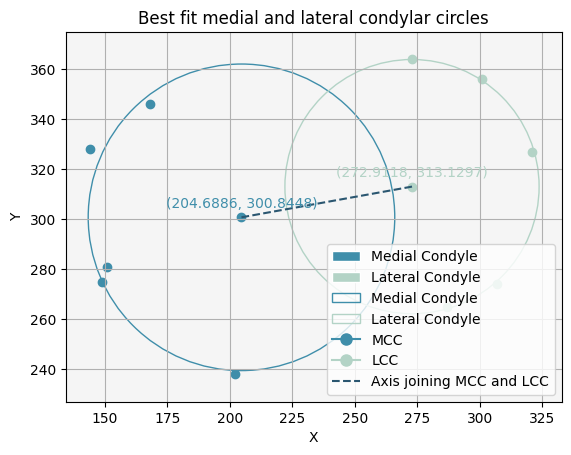

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from IPython.display import display, Math

def ls_circle(xx, yy):
    asize = np.size(xx) # number of coordinate points given, atleast 30 minimum for the Cobb's Method
    J = np.zeros((asize, 3)) # Jacobian matrix
    K = np.zeros(asize)

    for ix in range(0, asize):
        x = xx[ix]
        y = yy[ix]

        J[ix, 0] = x*x + y*y
        J[ix, 1] = x
        J[ix, 2] = y
        K[ix] = 1.0

    K = K.transpose()
    JT = J.transpose()
    JTJ = np.dot(JT, J)
    InvJTJ = np.linalg.inv(JTJ)

    # Determining the coefficients
    ABC = np.dot(InvJTJ, np.dot(JT, K))
    A = ABC[0]
    B = ABC[1]
    C = ABC[2]

    xofs = -B / (2 * A) # x-coordinate of the centre
    yofs = -C / (2 * A) # y-coordinate of the centre
    R = np.sqrt(4 * A + B*B + C*C) / (2 * A) # radius of the best fit circle
    if R < 0.0: #can't have a negative radius
        R = -R

    return xofs, yofs, R

# manually plugging in the points for now, will be automated later
if __name__ == '__main__':
    # xx1 = np.array([
    #     2.2331, 2.5712, 2.7397, 2.6899,
    #     2.4360, 2.0610, 1.5977, 1.1202,
    #     0.7375, 0.6, 0.2624, 0.4069,
    #     0.6400, 1.0078, 1.4793, 1.9598
    # ])

    # yy1 = np.array([
    #     0.5676, 0.8002, 1.3492, 1.8300,
    #     1.2661, 2.5607, 2.7243, 2.1918,
    #     2.4032, 2.0740, 1.0964, 1.1327,
    #     0.7084, 0.4101, 0.3921, 0.3840
    # ])

    # xx2 = np.array([
    # 7.0, 6.928, 6.707, 6.346,
    # 5.893, 5.383, 4.857, 4.357,
    # 3.893, 3.483, 3.143, 2.886,
    # 2.722, 2.657, 2.693, 2.829,
    # 3.057, 3.365, 3.738, 4.157,
    # 4.597, 5.031, 5.429, 5.764, 6.0
    # ])

    # yy2 = np.array([
    #     5.0, 5.346, 5.707, 6.071,
    #     6.383, 6.617, 6.748, 6.762,
    #     6.657, 6.438, 6.122, 5.735,
    #     5.307, 4.871, 4.457, 4.096,
    #     3.817, 3.646, 3.598, 3.679,
    #     3.882, 4.196, 4.602, 5.075, 5.0
    # ])

    xx1 = np.array([
        202, 149, 151, 144,
        168
    ])

    yy1 = np.array([
        238, 275, 281, 328,
        346
    ])

    xx2 = np.array([
    287, 307, 321, 301, 273
    ])
    
    yy2 = np.array([
        265, 274, 327, 356, 364
    ])

    ans1 = ls_circle(xx1, yy1)
    ans2 = ls_circle(xx2, yy2)

    ss1 = "Medial Condyle: MCC at (%8.4f, %8.4f) Radius: %8.4f" % ans1
    ss2 = "Lateral Condyle: LCC at (%8.4f, %8.4f) Radius: %8.4f" % ans2
    print(ss1)
    print(ss2)

    plt.grid(True)
    plt.axis('equal')

    # Plot the points for both circles
    plt.scatter(xx1, yy1, label='Coordinates - Medial Condyle', color='#3f8eaa')  
    plt.scatter(xx2, yy2, label='Coordinates - Lateral Condyle', color='#b3d3c6')  

    # Plot the fitted circles
    circle1 = plt.Circle((ans1[0], ans1[1]), ans1[2], color='#3f8eaa', fill=False, label='Medial Condyle')
    circle2 = plt.Circle((ans2[0], ans2[1]), ans2[2], color='#b3d3c6', fill=False, label='Lateral Condyle')
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)

    # Scatter plot for center points
    plt.scatter(ans1[0], ans1[1], color='#3f8eaa', marker='o', label='Center 1')
    plt.scatter(ans2[0], ans2[1], color='#b3d3c6', marker='o', label='Center 2')

    # Annotate the center points with labels
    plt.annotate(f'({ans1[0]:.4f}, {ans1[1]:.4f})', (ans1[0], ans1[1]), textcoords="offset points", xytext=(0,5), ha='center', va='bottom', color='#3f8eaa')
    plt.annotate(f'({ans2[0]:.4f}, {ans2[1]:.4f})', (ans2[0], ans2[1]), textcoords="offset points", xytext=(0,5), ha='center', va='bottom', color='#b3d3c6')
    
    # Connect the centers with a line
    plt.plot([ans1[0], ans2[0]], [ans1[1], ans2[1]], color ='#2a5670', linestyle='--', label='Center Line')

    # Set labels and legend
    plt.title('Best fit medial and lateral condylar circles')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Add a legend with the new line
    legend_elements = [
        Patch(facecolor='#3f8eaa', edgecolor='w', label='Medial Condyle'),
        Patch(facecolor='#b3d3c6', edgecolor='w', label='Lateral Condyle'),
        circle1,
        circle2,
        plt.Line2D([0], [0], marker='o', color='#3f8eaa', label='MCC', markersize=8),
        plt.Line2D([0], [0], marker='o', color='#b3d3c6', label='LCC', markersize=8),
        plt.Line2D([0], [0], color ='#2a5670', linestyle='--', label='Axis joining MCC and LCC')
    ]

    plt.legend(handles=legend_elements, loc='lower right')

    # Set the background color
    plt.gca().set_facecolor('#f5f5f5')

    # Show the plot
    plt.show()
